In [1]:
## This notebook is used to visualize embeddings. Change the source_path

import matplotlib
import matplotlib.pyplot as plt
import numpy as np
from sklearn.manifold import TSNE

from gem.evaluation import visualize_embedding as viz
from os import listdir
import pandas as pd
import csv

In [2]:
def reduce_dim(embedding):    
    if np.shape(embedding)[1] > 2: # Reduce dimensions to make plotting in 2D easier.
        print("TSNE reducing " + str(np.shape(embedding)[1]) + " to 2 dimensions")
        tsne = TSNE(n_components=2, learning_rate = 25, n_iter = 5000, perplexity = 5)
        embeddings_2d = tsne.fit_transform(embedding)
        return embeddings_2d
    return np.array(embedding)

def visualize_graphs(embedding_list, names = None, mode = None):    
    matplotlib.use('nbAgg')    
    for n in range(0,len(embedding_list)): # Plot all embeddings in 2d using the reduce_dim function
        plt.figure(n+1,figsize=(8,8)) # Create figures for each embedding
        if names:            
                plt.title(names[n])
                
        if mode:
            viz.plot_embedding2D(embedding_list[n], di_graph=G, node_colors=None)
        else:
            embedding = reduce_dim(embedding_list[n])            
            x, y = embedding[:,0], embedding[:,1] # Creating x and y vectors
            num_nodes = list(range(x.size))
            labels = [str(i) for i in list(range(x.size))] ## Label all previously sorted points.               
            plt.scatter(x,y,s=50)   
            for i in range(x.size):                        
                plt.text(x=x[i],y=y[i],s= labels[i])
        plt.show()
        plt.savefig("D:/Universiteit Utrecht/_Master/Scriptie/TESTIE",dpi=600)
    


def open_embeddings(directories):
    embedding_list = []
    for i in directories:
        print("opened dataset: " + i)
        with open(i) as csvfile:
            embedding = list()
            csvReader = csv.reader(csvfile, delimiter=',')
            # skip header
            next(csvReader,None)

            for row in csvReader:               
                # delete the index (indices are sorted elsewhere in the pipeline)
                embedding.append([float(i) for i in row[1:]])
        embedding_list.append(embedding)
    return embedding_list # Return nested embedding list

       

In [3]:
source_path = "D:/Universiteit Utrecht/_Master/Scriptie/Project_files/"
dataset = "barbell"
folder = "PCA"
path = source_path + "data/output/" + dataset + "/preprocessed/" + folder
embeddings = []

import os
for entry in os.scandir(path):
    if entry.is_dir():
        # skip directories
        continue
    embeddings.append(entry.name) # list all embeddings in this dataset folder
names = [embedding.replace("embedding_","").replace(".txt","") for embedding in embeddings] # create names for the embeddings

directories = [path + "/" + s for s in embeddings] # create full paths for the embeddings
# Open the embeddings in the specified folder
embedding_list = open_embeddings(directories) # open all embeddings and return an embedding_list

opened dataset: D:/Universiteit Utrecht/_Master/Scriptie/Project_files/data/output/barbell/preprocessed/PCA/PCA_attentionWalk_0.txt
opened dataset: D:/Universiteit Utrecht/_Master/Scriptie/Project_files/data/output/barbell/preprocessed/PCA/PCA_attentionWalk_1.txt
opened dataset: D:/Universiteit Utrecht/_Master/Scriptie/Project_files/data/output/barbell/preprocessed/PCA/PCA_attentionWalk_2.txt
opened dataset: D:/Universiteit Utrecht/_Master/Scriptie/Project_files/data/output/barbell/preprocessed/PCA/PCA_attentionWalk_3.txt
opened dataset: D:/Universiteit Utrecht/_Master/Scriptie/Project_files/data/output/barbell/preprocessed/PCA/PCA_attentionWalk_4.txt
opened dataset: D:/Universiteit Utrecht/_Master/Scriptie/Project_files/data/output/barbell/preprocessed/PCA/PCA_deepwalk_0.txt
opened dataset: D:/Universiteit Utrecht/_Master/Scriptie/Project_files/data/output/barbell/preprocessed/PCA/PCA_deepwalk_1.txt
opened dataset: D:/Universiteit Utrecht/_Master/Scriptie/Project_files/data/output/bar

<IPython.core.display.Javascript object>


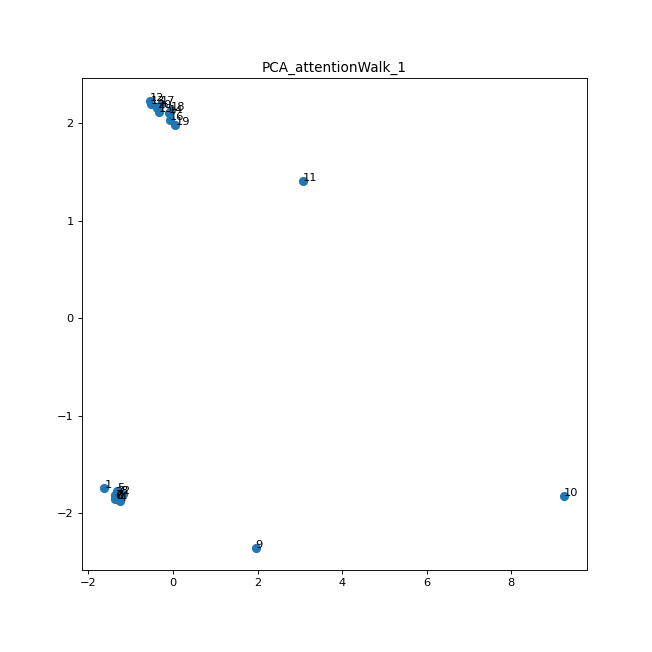

<IPython.core.display.Javascript object>


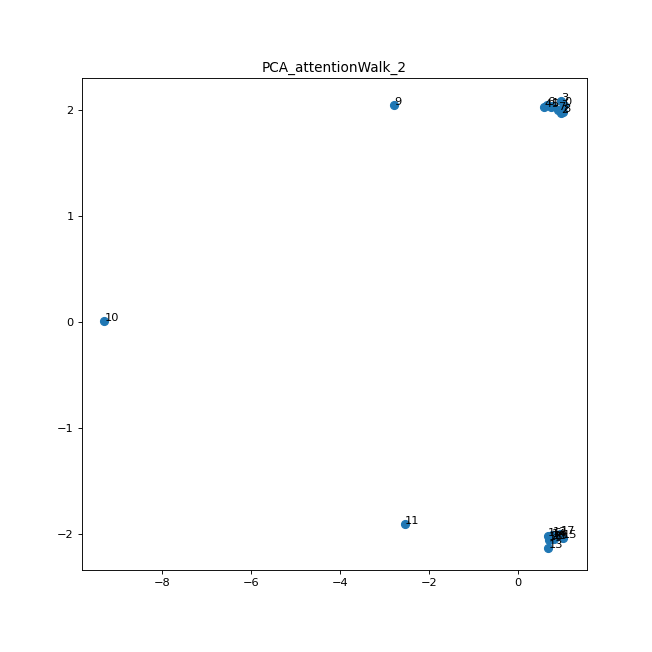

<IPython.core.display.Javascript object>


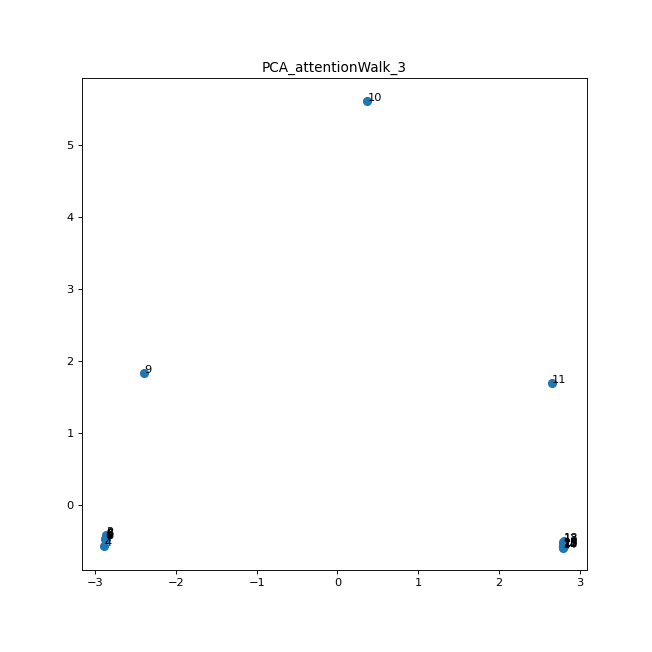

<IPython.core.display.Javascript object>


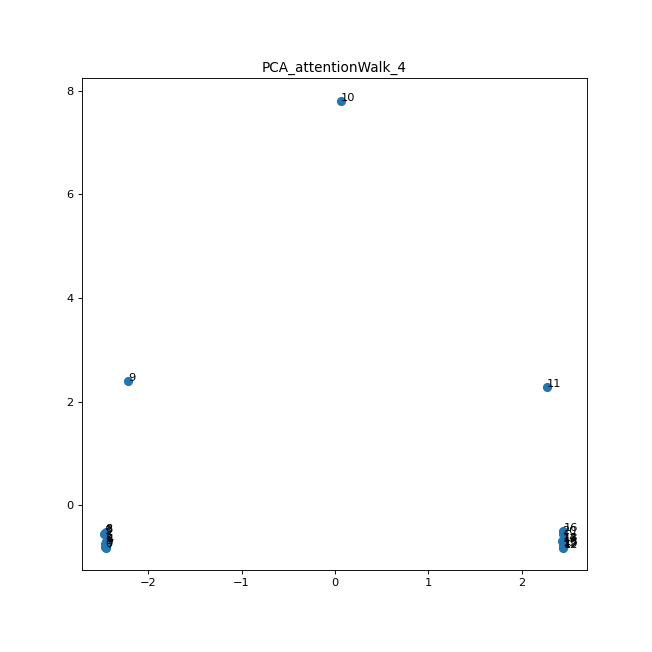

In [4]:
visualize_graphs(embedding_list[1:5],names[1:5])